In [1]:
import pandas as pd
import numpy as np
def normalize_feature(df):
    return df.apply(lambda column:(column-column.mean())/column.std())

df=normalize_feature(pd.read_csv('data1.csv',names=['square','bedroom','price']))
ones=pd.DataFrame({'ones':np.ones(len(df))})
df=pd.concat([ones,df],axis=1)
df.head()


,ones,square,bedroom,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


In [2]:
x_data=np.array(df[df.columns[0:3]])
y_data=np.array(df[df.columns[-1]]).reshape(len(df),1)

print(x_data.shape)
print(y_data.shape)

(47, 3)
(47, 1)


In [3]:
import  tensorflow as tf
alpha=0.01
epoch=500
with tf.name_scope('input'):
    x=tf.placeholder(tf.float32,x_data.shape,name='x')
    y=tf.placeholder(tf.float32,y_data.shape,name='y')

with tf.name_scope('hypothesis'):
    w=tf.get_variable('w',(x_data.shape[1],1),initializer=tf.constant_initializer())
    y_pred=tf.matmul(x,w)
with tf.name_scope('loss'):
    loss_op=1/(2*len(x_data))*tf.matmul(y_pred-y,y_pred-y,transpose_a=True)
with tf.name_scope('train'):
    train_op=tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(loss_op)



D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dty

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer=tf.summary.FileWriter('./summary/linear-regreesion-1',sess.graph)
    loss_data=[]
    for i in range(1,epoch+1):
        sess.run(train_op,feed_dict={x:x_data,y:y_data})
        if i%10==0 :
            loss,ww=sess.run([loss_op,w],feed_dict={x:x_data,y:y_data})
            loss_data.append(float(loss))
            log_str="Epoch %d \t Loss=%.4g \t Model: y= %.4gx1 + %.4gx2 + %.4g"
            print(log_str % (i,loss,ww[1],ww[2],ww[0]))

Epoch 10 	 Loss=0.4116 	 Model: y= 0.0791x1 + 0.03948x2 + 3.353e-10
Epoch 20 	 Loss=0.353 	 Model: y= 0.1489x1 + 0.07135x2 + -5.588e-11
Epoch 30 	 Loss=0.3087 	 Model: y= 0.2107x1 + 0.09676x2 + 3.912e-10
Epoch 40 	 Loss=0.2748 	 Model: y= 0.2655x1 + 0.1167x2 + -1.863e-11
Epoch 50 	 Loss=0.2489 	 Model: y= 0.3142x1 + 0.1321x2 + 1.77e-10
Epoch 60 	 Loss=0.2288 	 Model: y= 0.3576x1 + 0.1436x2 + -4.47e-10
Epoch 70 	 Loss=0.2131 	 Model: y= 0.3965x1 + 0.1519x2 + -8.103e-10
Epoch 80 	 Loss=0.2007 	 Model: y= 0.4313x1 + 0.1574x2 + -6.985e-10
Epoch 90 	 Loss=0.1908 	 Model: y= 0.4626x1 + 0.1607x2 + -4.936e-10
Epoch 100 	 Loss=0.1828 	 Model: y= 0.4909x1 + 0.1621x2 + -6.147e-10
Epoch 110 	 Loss=0.1763 	 Model: y= 0.5165x1 + 0.162x2 + -7.87e-10
Epoch 120 	 Loss=0.1709 	 Model: y= 0.5397x1 + 0.1606x2 + -5.821e-10
Epoch 130 	 Loss=0.1664 	 Model: y= 0.5609x1 + 0.1581x2 + -9.08e-10
Epoch 140 	 Loss=0.1625 	 Model: y= 0.5802x1 + 0.1549x2 + -9.965e-10
Epoch 150 	 Loss=0.1592 	 Model: y= 0.5979x1 + 0.

In [6]:
print(len(loss_data))



50


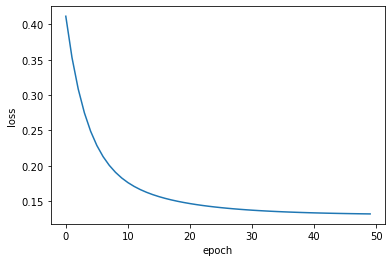

In [9]:
import  matplotlib.pyplot as plt
import  seaborn as sns
ax=sns.lineplot(x='epoch',y='loss',data=pd.DataFrame({'loss':loss_data,'epoch':np.arange(50)}))
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

